In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load predicted function
with open("/Users/abhinavbarat/Documents/bionemo_protein_rag/outputs/Q13286_prediction.txt", "r") as f:
    predicted_function = f.read().strip()

# Load ground truth CSV
ground_truth_df = pd.read_csv("/Users/abhinavbarat/Documents/bionemo_protein_rag/data/ground_truth.csv")  # columns: protein_id,true_function

# Get the ground truth for Q13286
row = ground_truth_df[ground_truth_df["protein_id"] == "Q13286"]
if row.empty:
    raise ValueError("No ground truth found for Q13286")
true_function = row["function_description"].values[0]

print(f"Predicted: {predicted_function}")
print(f"Ground truth: {true_function}")

# Compute semantic similarity
model = SentenceTransformer("pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb")

pred_emb = model.encode(predicted_function, convert_to_tensor=True)
true_emb = model.encode(true_function, convert_to_tensor=True)

similarity_score = util.pytorch_cos_sim(pred_emb, true_emb).item()
print(f"\n Cosine Similarity Score: {similarity_score:.4f}")


Predicted: DNA repair.
Ground truth: Involved in DNA damage checkpoint and repair via recruitment to double-strand breaks

 Cosine Similarity Score: 0.5640


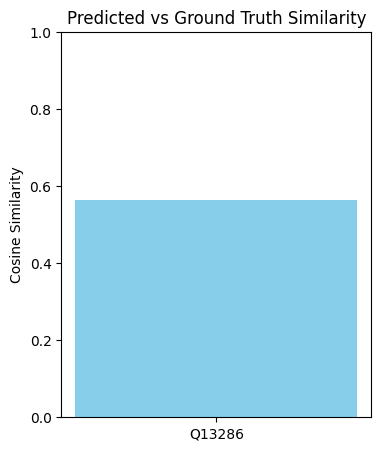

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
plt.bar(["Q13286"], [similarity_score], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Cosine Similarity")
plt.title("Predicted vs Ground Truth Similarity")
plt.show()
